In [1]:
pip install tsplib95


   ---------------------------------------- 0.0/97.9 kB ? eta -:--:--
   ---------------- ----------------------- 41.0/97.9 kB 991.0 kB/s eta 0:00:01
   ---------------------------------------- 97.9/97.9 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
    --------------------------------------- 0.0/2.0 MB 1.9 MB/s eta 0:00:02
   - -------------------------------------- 0.1/2.0 MB 1.7 MB/s eta 0:00:02
   -- ------------------------------------- 0.1/2.0 MB 1.4 MB/s eta 0:00:02
   --- ------------------------------------ 0.2/2.0 MB 1.1 MB/s eta 0:00:02
   ---- ----------------------------------- 0.2/2.0 MB 1.1 MB/s eta 0:00:02
   ----- ---------------------------------- 0.3/2.0 MB 1.2 MB/s eta 0:00:02
   ------- -------------------------------- 0.4/2.0 MB 1.2 MB/s eta 0:00:02
   -------- ------------------------------- 0.4/2.0 MB 1.3 MB/s eta 0:00:02
   --------- ------------------------------ 0.5/2.0 MB 1.3 MB/s eta 0:00:02
   ----------- ----

In [5]:
import tsplib95
import random
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate the total distance of a tour
def calculate_distance(tour, distance_matrix):
    return sum(distance_matrix[tour[i-1]][tour[i]] for i in range(len(tour)))

# Function to create an initial population
def create_initial_population(size, num_cities):
    return [random.sample(range(num_cities), num_cities) for _ in range(size)]

# Function to perform tournament selection
def tournament_selection(population, fitnesses, k=3):
    selected = random.sample(list(zip(population, fitnesses)), k)
    selected.sort(key=lambda x: x[1])
    return selected[0][0]

# Function to perform roulette wheel selection
def roulette_wheel_selection(population, fitnesses):
    max_fitness = sum(fitnesses)
    pick = random.uniform(0, max_fitness)
    current = 0
    for i in range(len(population)):
        current += fitnesses[i]
        if current > pick:
            return population[i]

# Function to perform ordered crossover (OX1)
def ordered_crossover(parent1, parent2):
    size = len(parent1)
    start, end = sorted(random.sample(range(size), 2))
    child = [None]*size
    child[start:end] = parent1[start:end]
    pointer = end
    for i in range(size):
        if parent2[(end + i) % size] not in child:
            child[pointer % size] = parent2[(end + i) % size]
            pointer += 1
    return child

# Function to perform partially mapped crossover (PMX)
def partially_mapped_crossover(parent1, parent2):
    size = len(parent1)
    start, end = sorted(random.sample(range(size), 2))
    child = [None] * size

    # Copy segment from first parent to child
    child[start:end] = parent1[start:end]

    # Mapping from second parent
    for i in range(start, end):
        if parent2[i] not in child:
            current_pos = i
            while start <= current_pos < end:
                current_pos = parent1.index(parent2[current_pos])
            child[current_pos] = parent2[i]

    # Fill remaining positions
    for i in range(size):
        if child[i] is None:
            child[i] = parent2[i]

    return child

# Function to perform swap mutation
def swap_mutation(tour):
    a, b = random.sample(range(len(tour)), 2)
    tour[a], tour[b] = tour[b], tour[a]
    return tour

# Function to perform inversion mutation
def inversion_mutation(tour):
    a, b = sorted(random.sample(range(len(tour)), 2))
    tour[a:b] = reversed(tour[a:b])
    return tour

# Function to ensure valid TSP tour after crossover or mutation
def ensure_valid_tour(tour):
    missing = set(range(len(tour))) - set(tour)
    duplicates = [item for item in tour if tour.count(item) > 1]
    for dup in duplicates:
        tour[tour.index(dup)] = missing.pop()
    return tour

# Genetic Algorithm to solve TSP
def genetic_algorithm(distance_matrix, population_size=100, generations=500, mutation_rate=0.1, selection_method='tournament'):
    num_cities = len(distance_matrix)
    population = create_initial_population(population_size, num_cities)
    best_tour = None
    best_distance = float('inf')
    best_distances = []

    for gen in range(generations):
        fitnesses = [calculate_distance(tour, distance_matrix) for tour in population]
        new_population = []
        for _ in range(population_size // 2):
            if selection_method == 'tournament':
                parent1 = tournament_selection(population, fitnesses)
                parent2 = tournament_selection(population, fitnesses)
            elif selection_method == 'roulette':
                parent1 = roulette_wheel_selection(population, fitnesses)
                parent2 = roulette_wheel_selection(population, fitnesses)
                
            child1 = ordered_crossover(parent1, parent2)
            child2 = ordered_crossover(parent2, parent1)
            if random.random() < mutation_rate:
                child1 = swap_mutation(child1)
            if random.random() < mutation_rate:
                child2 = swap_mutation(child2)
            new_population.extend([ensure_valid_tour(child1), ensure_valid_tour(child2)])

        population = new_population
        current_best_distance = min(fitnesses)
        best_distances.append(current_best_distance)
        if current_best_distance < best_distance:
            best_distance = current_best_distance
            best_tour = population[fitnesses.index(current_best_distance)]
        print(f'Generation {gen}: Best Distance = {best_distance}')
    
    # Plot the evolution of the best distance
    plt.figure(figsize=(10, 6))
    plt.plot(best_distances, 'b-', label='Best Distance')
    plt.xlabel('Generation')
    plt.ylabel('Distance')
    plt.title('Evolution of the Minimum Total Traveling Distance')
    plt.legend()
    plt.show()

    return best_tour, best_distance

# Function to plot the best tour found
def plot_tour(tour, coords):
    num_cities = len(tour)
    x = [coords[city][0] for city in tour]
    y = [coords[city][1] for city in tour]
    
    plt.figure(figsize=(10, 6))
    plt.plot(x + [x[0]], y + [y[0]], 'bo-', label='Tour Path')
    for i, city in enumerate(tour):
        plt.text(coords[city][0], coords[city][1], str(city), fontsize=12, color='red')
    
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Tour Plot')
    plt.legend()
    plt.grid(True)
    plt.show()


Running GA on dataset: five_d.txt
Generation 0: Best Distance = 19.0
Generation 1: Best Distance = 19.0
Generation 2: Best Distance = 19.0
Generation 3: Best Distance = 19.0
Generation 4: Best Distance = 19.0
Generation 5: Best Distance = 19.0
Generation 6: Best Distance = 19.0
Generation 7: Best Distance = 19.0
Generation 8: Best Distance = 19.0
Generation 9: Best Distance = 19.0
Generation 10: Best Distance = 19.0
Generation 11: Best Distance = 19.0
Generation 12: Best Distance = 19.0
Generation 13: Best Distance = 19.0
Generation 14: Best Distance = 19.0
Generation 15: Best Distance = 19.0
Generation 16: Best Distance = 19.0
Generation 17: Best Distance = 19.0
Generation 18: Best Distance = 19.0
Generation 19: Best Distance = 19.0
Generation 20: Best Distance = 19.0
Generation 21: Best Distance = 19.0
Generation 22: Best Distance = 19.0
Generation 23: Best Distance = 19.0
Generation 24: Best Distance = 19.0
Generation 25: Best Distance = 19.0
Generation 26: Best Distance = 19.0
Gene

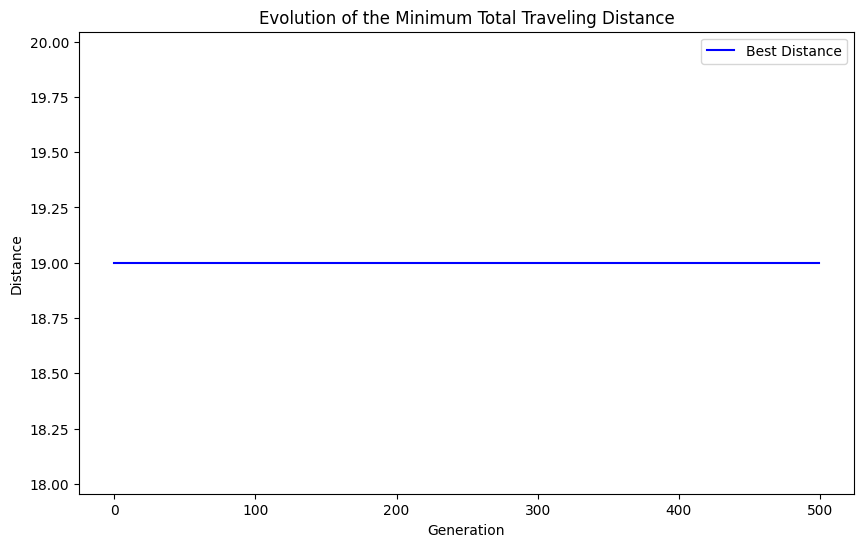

Best tour: [0, 1, 3, 4, 2]
Best distance: 19.0



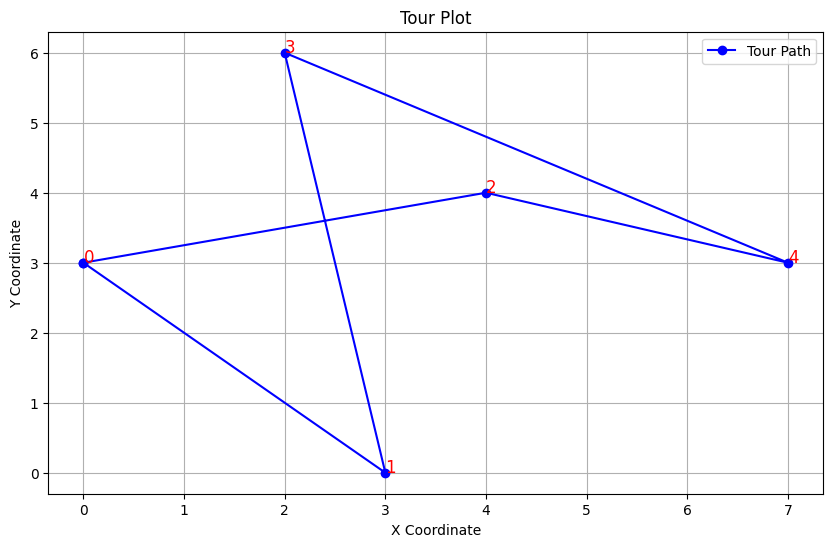

In [6]:
# Dataset five_d.txt
def load_five_d_data(filename):
    with open(filename, 'r') as file:
        distance_matrix = []
        for line in file:
            if line.strip():  # Skip empty lines
                row = line.split()
                distance_matrix.append([float(num) for num in row])
    return np.array(distance_matrix)

print(f'Running GA on dataset: five_d.txt')
distance_matrix = load_five_d_data('C:/Users/Kuldeep/five_d.txt')
best_tour, best_distance = genetic_algorithm(distance_matrix)
print(f'Best tour: {best_tour}\nBest distance: {best_distance}\n')
plot_tour(best_tour, distance_matrix)

Running GA on dataset: p01.tsp
Generation 0: Best Distance = 505
Generation 1: Best Distance = 455
Generation 2: Best Distance = 455
Generation 3: Best Distance = 432
Generation 4: Best Distance = 432
Generation 5: Best Distance = 432
Generation 6: Best Distance = 432
Generation 7: Best Distance = 432
Generation 8: Best Distance = 424
Generation 9: Best Distance = 413
Generation 10: Best Distance = 409
Generation 11: Best Distance = 409
Generation 12: Best Distance = 409
Generation 13: Best Distance = 405
Generation 14: Best Distance = 340
Generation 15: Best Distance = 340
Generation 16: Best Distance = 340
Generation 17: Best Distance = 340
Generation 18: Best Distance = 340
Generation 19: Best Distance = 340
Generation 20: Best Distance = 334
Generation 21: Best Distance = 334
Generation 22: Best Distance = 334
Generation 23: Best Distance = 331
Generation 24: Best Distance = 329
Generation 25: Best Distance = 327
Generation 26: Best Distance = 325
Generation 27: Best Distance = 325

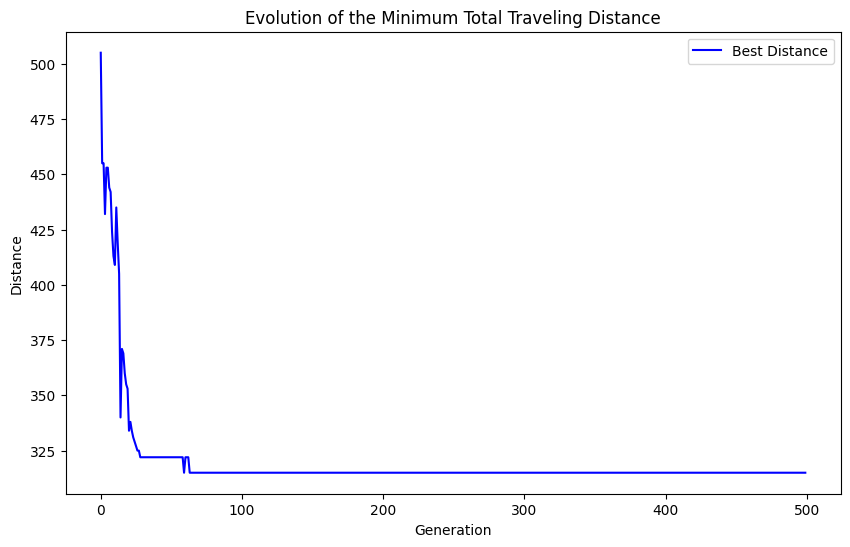

Best tour: [4, 6, 7, 9, 2, 11, 13, 5, 3, 10, 0, 12, 1, 14, 8]
Best distance: 315



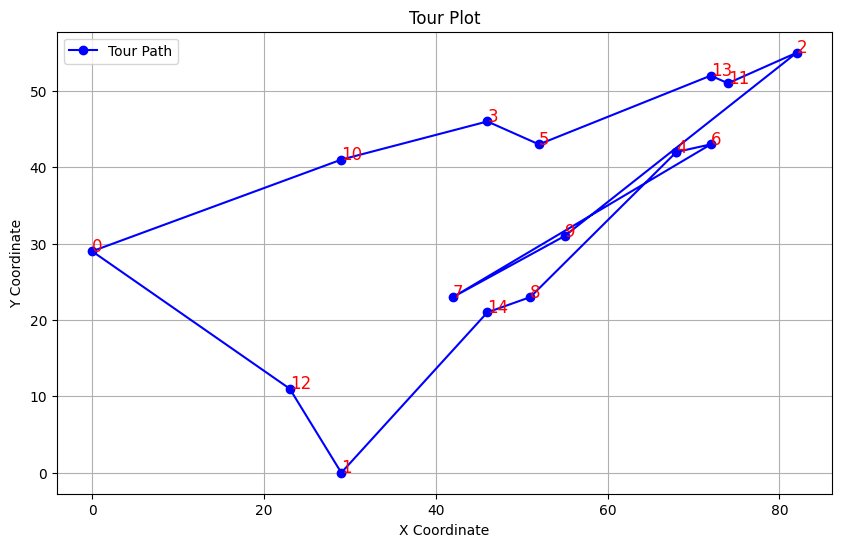

In [102]:
# Dataset p01.tsp
# Manual loading for p01.tsp
def load_p01_tsp_manual(filename):
    with open(filename, 'r') as file:
        data = file.read().splitlines()
    dimension = 0
    edge_weight_section = False
    distance_matrix = []
    for line in data:
        if line.startswith("DIMENSION"):
            dimension = int(line.split()[-1])
        elif line.startswith("EDGE_WEIGHT_SECTION"):
            edge_weight_section = True
            continue
        elif line.startswith("EOF"):
            break
        elif edge_weight_section:
            numbers = list(map(int, line.split()))
            distance_matrix.append(numbers)
    distance_matrix = np.array(distance_matrix)
    return distance_matrix
    
print(f'Running GA on dataset: p01.tsp')
distance_matrix = load_p01_tsp_manual('C:/Users/Kuldeep/p01.tsp')
best_tour, best_distance = genetic_algorithm(distance_matrix)
print(f'Best tour: {best_tour}\nBest distance: {best_distance}\n')
plot_tour(best_tour, distance_matrix)

Running GA on dataset: dantzig42_d
Generation 0: Best Distance = 2507.0
Generation 1: Best Distance = 2407.0
Generation 2: Best Distance = 2244.0
Generation 3: Best Distance = 2244.0
Generation 4: Best Distance = 2171.0
Generation 5: Best Distance = 2074.0
Generation 6: Best Distance = 2058.0
Generation 7: Best Distance = 2058.0
Generation 8: Best Distance = 2050.0
Generation 9: Best Distance = 2022.0
Generation 10: Best Distance = 2022.0
Generation 11: Best Distance = 1928.0
Generation 12: Best Distance = 1928.0
Generation 13: Best Distance = 1877.0
Generation 14: Best Distance = 1877.0
Generation 15: Best Distance = 1815.0
Generation 16: Best Distance = 1815.0
Generation 17: Best Distance = 1803.0
Generation 18: Best Distance = 1803.0
Generation 19: Best Distance = 1803.0
Generation 20: Best Distance = 1790.0
Generation 21: Best Distance = 1757.0
Generation 22: Best Distance = 1670.0
Generation 23: Best Distance = 1670.0
Generation 24: Best Distance = 1670.0
Generation 25: Best Dista

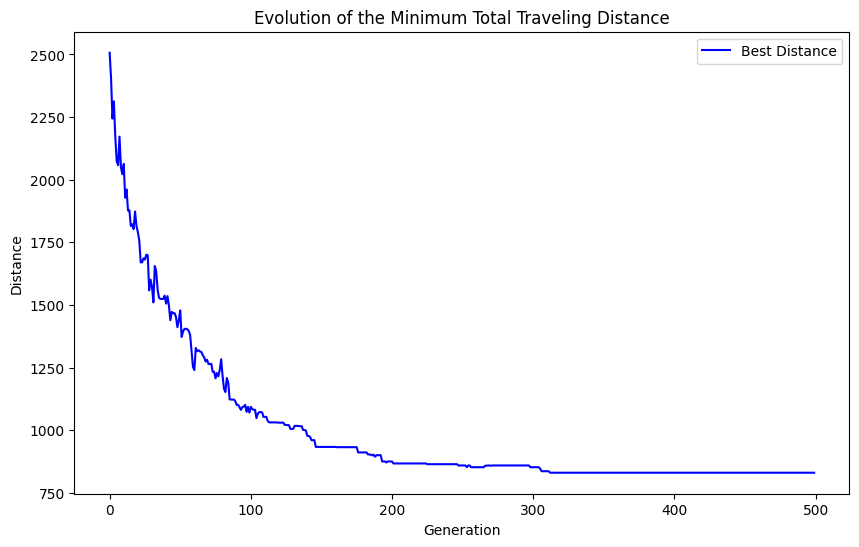

Best tour: [28, 27, 21, 20, 19, 18, 17, 15, 14, 13, 12, 16, 22, 10, 11, 9, 8, 7, 2, 3, 6, 5, 4, 37, 36, 34, 33, 32, 31, 25, 26, 23, 24, 1, 0, 41, 40, 39, 38, 35, 30, 29]
Best distance: 830.0



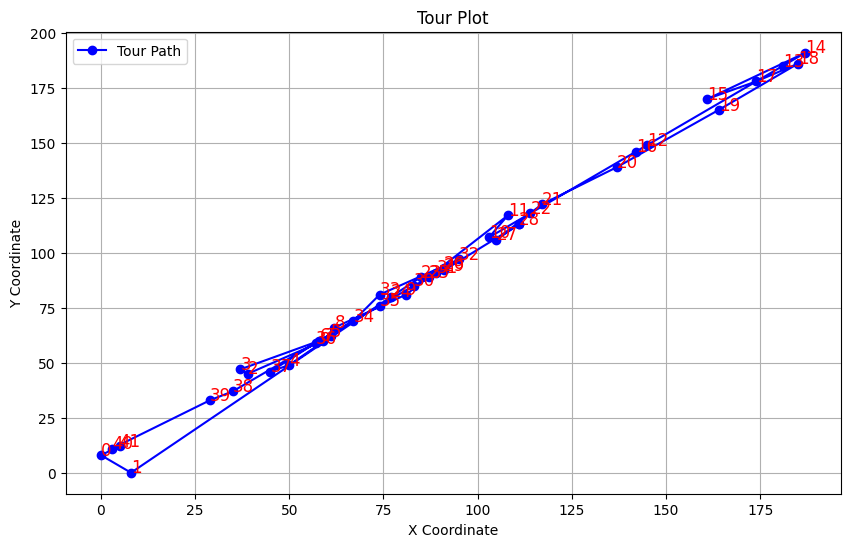

In [101]:
# Dataset dantzig42_d
print(f'Running GA on dataset: dantzig42_d')
distance_matrix = load_five_d_data('C:/Users/Kuldeep/dantzig42_d.txt')
best_tour, best_distance = genetic_algorithm(distance_matrix)
print(f'Best tour: {best_tour}\nBest distance: {best_distance}\n')
plot_tour(best_tour, distance_matrix)

Running GA on dataset: tsp225.tsp
Generation 0: Best Distance = 38538.0
Generation 1: Best Distance = 37458.0
Generation 2: Best Distance = 37458.0
Generation 3: Best Distance = 37380.0
Generation 4: Best Distance = 37380.0
Generation 5: Best Distance = 36869.0
Generation 6: Best Distance = 36733.0
Generation 7: Best Distance = 36563.0
Generation 8: Best Distance = 35958.0
Generation 9: Best Distance = 35230.0
Generation 10: Best Distance = 35230.0
Generation 11: Best Distance = 35185.0
Generation 12: Best Distance = 34621.0
Generation 13: Best Distance = 34180.0
Generation 14: Best Distance = 33741.0
Generation 15: Best Distance = 33741.0
Generation 16: Best Distance = 33741.0
Generation 17: Best Distance = 33741.0
Generation 18: Best Distance = 32802.0
Generation 19: Best Distance = 32802.0
Generation 20: Best Distance = 32570.0
Generation 21: Best Distance = 32525.0
Generation 22: Best Distance = 32422.0
Generation 23: Best Distance = 31855.0
Generation 24: Best Distance = 31855.0
G

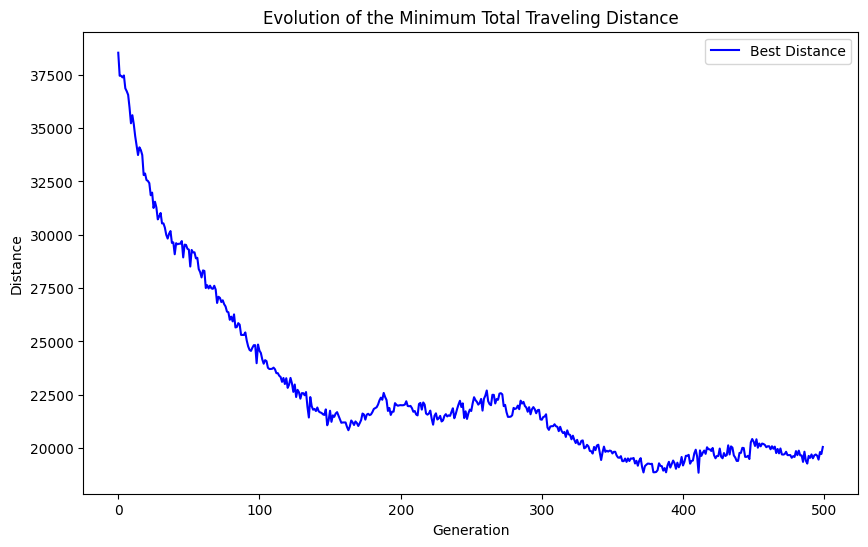

Best tour: [13, 35, 30, 48, 161, 133, 7, 167, 108, 171, 144, 135, 64, 204, 195, 224, 72, 106, 169, 54, 105, 53, 58, 55, 32, 183, 111, 165, 151, 157, 182, 149, 160, 158, 181, 172, 145, 148, 212, 164, 162, 154, 163, 190, 43, 39, 220, 79, 215, 90, 69, 52, 70, 122, 211, 147, 200, 139, 137, 136, 156, 142, 146, 177, 176, 179, 209, 155, 152, 153, 186, 116, 56, 87, 84, 129, 206, 188, 49, 1, 132, 51, 62, 24, 80, 91, 88, 82, 93, 99, 104, 89, 112, 63, 107, 168, 219, 77, 86, 59, 61, 113, 184, 36, 19, 16, 38, 8, 6, 33, 34, 178, 175, 173, 180, 68, 128, 125, 126, 81, 98, 114, 117, 101, 71, 100, 216, 28, 218, 31, 18, 37, 92, 46, 26, 60, 50, 66, 102, 78, 214, 221, 166, 150, 141, 140, 138, 159, 213, 110, 170, 120, 187, 75, 2, 196, 4, 217, 73, 42, 3, 41, 25, 203, 74, 11, 123, 109, 67, 205, 23, 207, 10, 201, 29, 22, 15, 12, 14, 17, 21, 76, 96, 208, 189, 192, 65, 222, 121, 185, 118, 115, 57, 198, 45, 199, 44, 174, 119, 131, 85, 83, 127, 210, 191, 97, 94, 130, 40, 5, 197, 47, 193, 223, 95, 27, 103, 124, 143

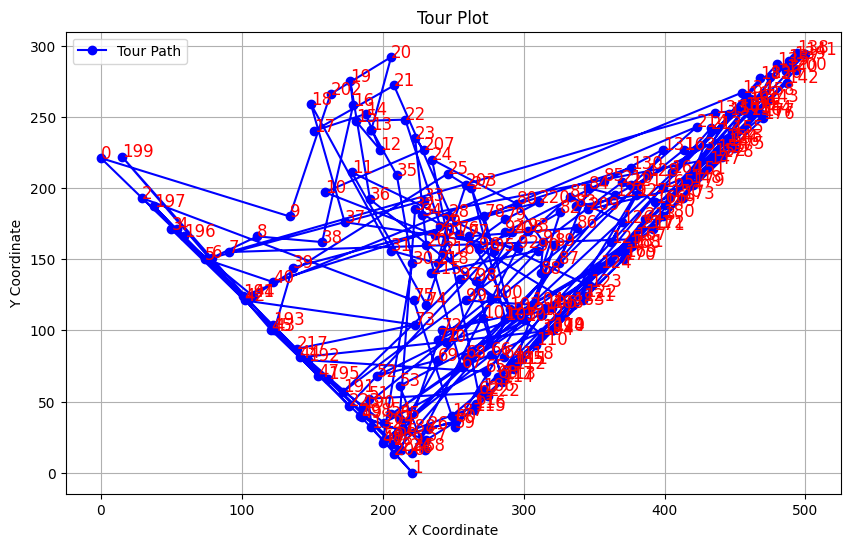

In [100]:
# Dataset tsp225.tsp
def load_tsplib_data(filename):
    problem = tsplib95.load(filename)
    nodes = list(problem.get_nodes())
    distance_matrix = np.zeros((len(nodes), len(nodes)))
    for i in nodes:
        for j in nodes:
            distance_matrix[i-1][j-1] = problem.get_weight(i, j)
    return distance_matrix

# Load the dataset and run the genetic algorithm
print(f'Running GA on dataset: tsp225.tsp')
distance_matrix = load_tsplib_data('C:/Users/Kuldeep/tsp225.tsp')
best_tour, best_distance = genetic_algorithm(distance_matrix)
print(f'Best tour: {best_tour}\nBest distance: {best_distance}\n')
plot_tour(best_tour, distance_matrix)

Running GA with population size 10 and generations 10
Generation 0: Best Distance = 21.0
Generation 1: Best Distance = 19.0
Generation 2: Best Distance = 19.0
Generation 3: Best Distance = 19.0
Generation 4: Best Distance = 19.0
Generation 5: Best Distance = 19.0
Generation 6: Best Distance = 19.0
Generation 7: Best Distance = 19.0
Generation 8: Best Distance = 19.0
Generation 9: Best Distance = 19.0


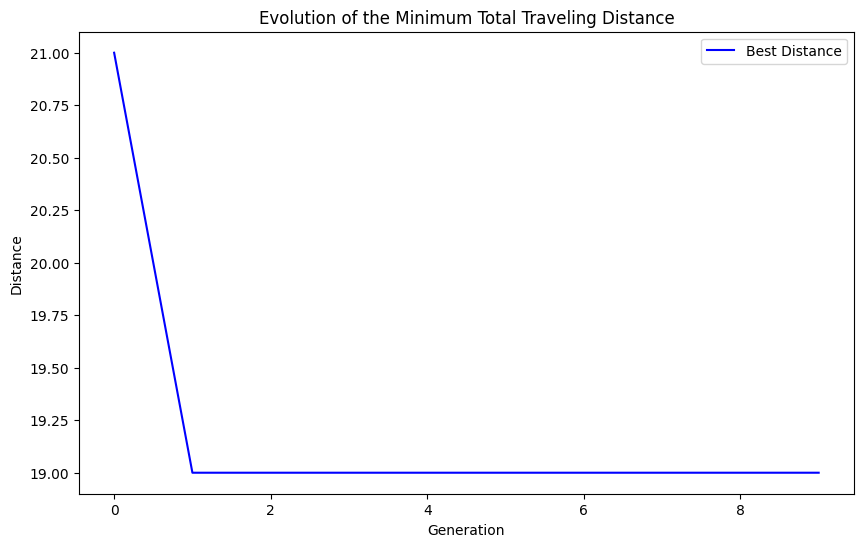

Best tour: [1, 2, 3, 0, 4]
Best distance: 19.0



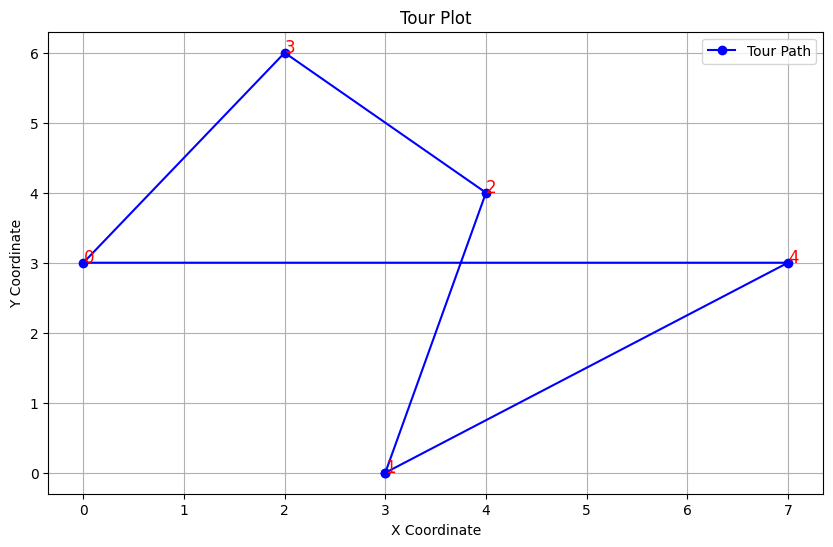

Running GA with population size 50 and generations 50
Generation 0: Best Distance = 19.0
Generation 1: Best Distance = 19.0
Generation 2: Best Distance = 19.0
Generation 3: Best Distance = 19.0
Generation 4: Best Distance = 19.0
Generation 5: Best Distance = 19.0
Generation 6: Best Distance = 19.0
Generation 7: Best Distance = 19.0
Generation 8: Best Distance = 19.0
Generation 9: Best Distance = 19.0
Generation 10: Best Distance = 19.0
Generation 11: Best Distance = 19.0
Generation 12: Best Distance = 19.0
Generation 13: Best Distance = 19.0
Generation 14: Best Distance = 19.0
Generation 15: Best Distance = 19.0
Generation 16: Best Distance = 19.0
Generation 17: Best Distance = 19.0
Generation 18: Best Distance = 19.0
Generation 19: Best Distance = 19.0
Generation 20: Best Distance = 19.0
Generation 21: Best Distance = 19.0
Generation 22: Best Distance = 19.0
Generation 23: Best Distance = 19.0
Generation 24: Best Distance = 19.0
Generation 25: Best Distance = 19.0
Generation 26: Best 

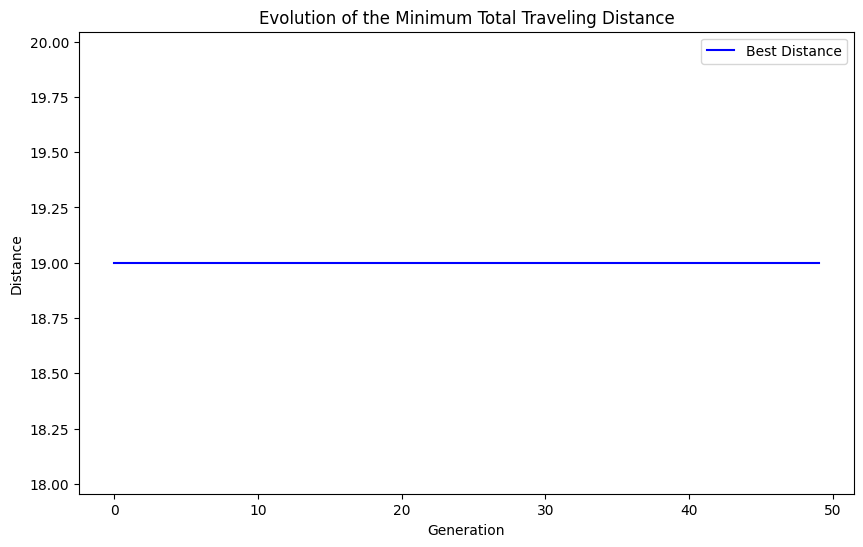

Best tour: [0, 2, 1, 4, 3]
Best distance: 19.0



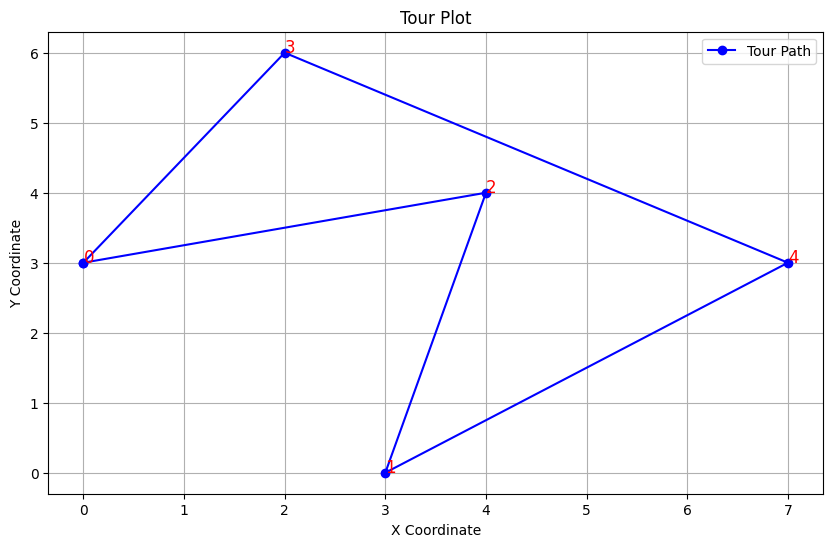

Running GA with population size 100 and generations 100
Generation 0: Best Distance = 19.0
Generation 1: Best Distance = 19.0
Generation 2: Best Distance = 19.0
Generation 3: Best Distance = 19.0
Generation 4: Best Distance = 19.0
Generation 5: Best Distance = 19.0
Generation 6: Best Distance = 19.0
Generation 7: Best Distance = 19.0
Generation 8: Best Distance = 19.0
Generation 9: Best Distance = 19.0
Generation 10: Best Distance = 19.0
Generation 11: Best Distance = 19.0
Generation 12: Best Distance = 19.0
Generation 13: Best Distance = 19.0
Generation 14: Best Distance = 19.0
Generation 15: Best Distance = 19.0
Generation 16: Best Distance = 19.0
Generation 17: Best Distance = 19.0
Generation 18: Best Distance = 19.0
Generation 19: Best Distance = 19.0
Generation 20: Best Distance = 19.0
Generation 21: Best Distance = 19.0
Generation 22: Best Distance = 19.0
Generation 23: Best Distance = 19.0
Generation 24: Best Distance = 19.0
Generation 25: Best Distance = 19.0
Generation 26: Bes

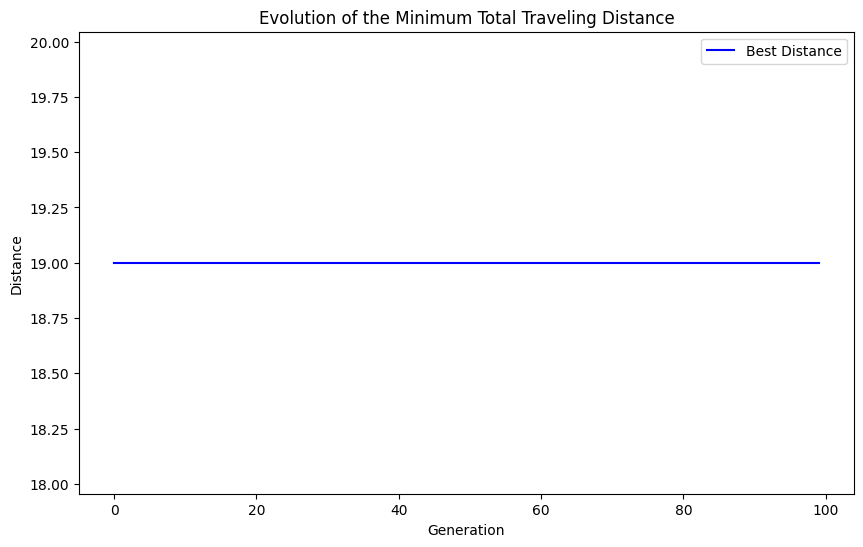

Best tour: [0, 1, 2, 3, 4]
Best distance: 19.0



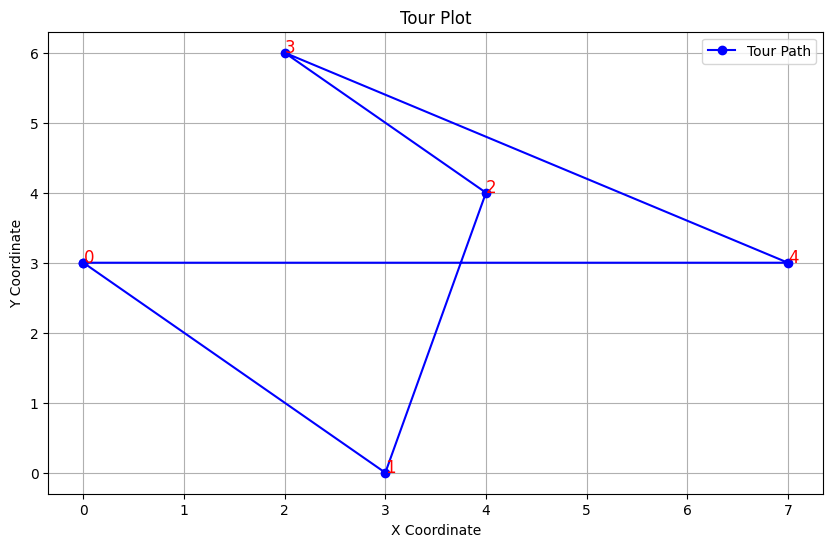

Running GA with population size 100 and generations 150
Generation 0: Best Distance = 19.0
Generation 1: Best Distance = 19.0
Generation 2: Best Distance = 19.0
Generation 3: Best Distance = 19.0
Generation 4: Best Distance = 19.0
Generation 5: Best Distance = 19.0
Generation 6: Best Distance = 19.0
Generation 7: Best Distance = 19.0
Generation 8: Best Distance = 19.0
Generation 9: Best Distance = 19.0
Generation 10: Best Distance = 19.0
Generation 11: Best Distance = 19.0
Generation 12: Best Distance = 19.0
Generation 13: Best Distance = 19.0
Generation 14: Best Distance = 19.0
Generation 15: Best Distance = 19.0
Generation 16: Best Distance = 19.0
Generation 17: Best Distance = 19.0
Generation 18: Best Distance = 19.0
Generation 19: Best Distance = 19.0
Generation 20: Best Distance = 19.0
Generation 21: Best Distance = 19.0
Generation 22: Best Distance = 19.0
Generation 23: Best Distance = 19.0
Generation 24: Best Distance = 19.0
Generation 25: Best Distance = 19.0
Generation 26: Bes

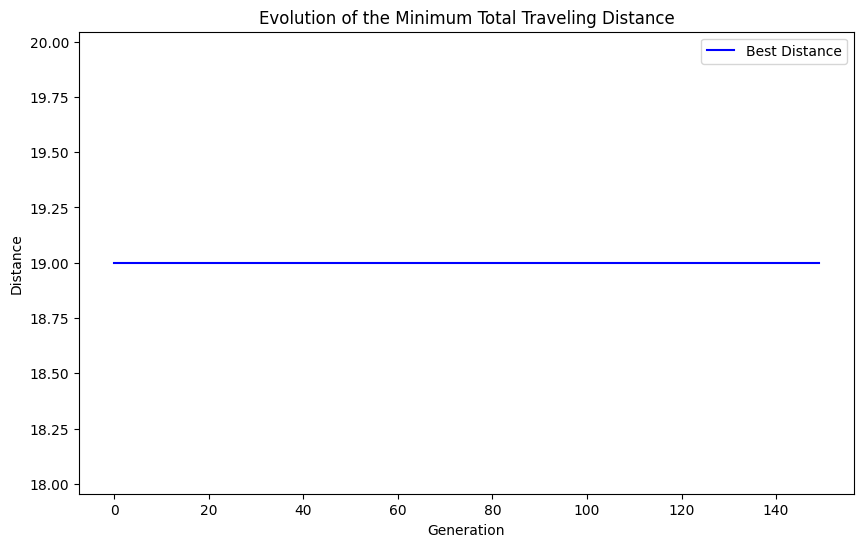

Best tour: [2, 3, 4, 0, 1]
Best distance: 19.0



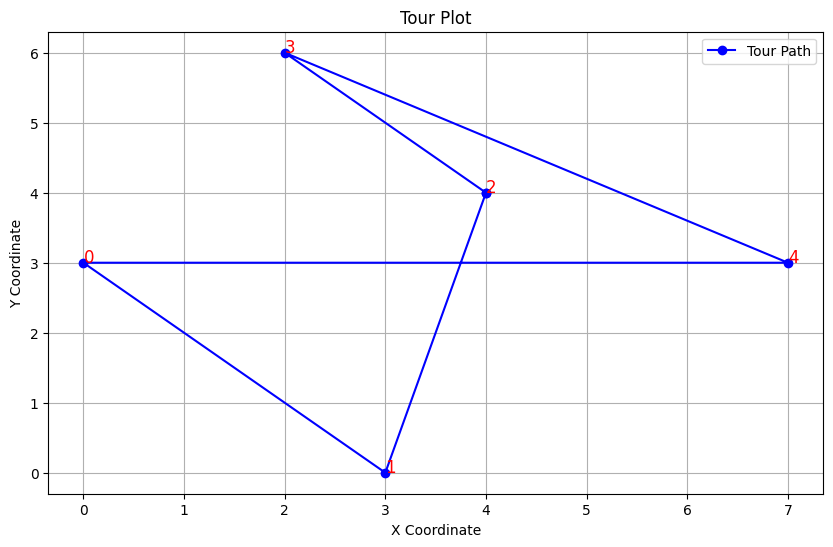

Running GA with population size 150 and generations 200
Generation 0: Best Distance = 19.0
Generation 1: Best Distance = 19.0
Generation 2: Best Distance = 19.0
Generation 3: Best Distance = 19.0
Generation 4: Best Distance = 19.0
Generation 5: Best Distance = 19.0
Generation 6: Best Distance = 19.0
Generation 7: Best Distance = 19.0
Generation 8: Best Distance = 19.0
Generation 9: Best Distance = 19.0
Generation 10: Best Distance = 19.0
Generation 11: Best Distance = 19.0
Generation 12: Best Distance = 19.0
Generation 13: Best Distance = 19.0
Generation 14: Best Distance = 19.0
Generation 15: Best Distance = 19.0
Generation 16: Best Distance = 19.0
Generation 17: Best Distance = 19.0
Generation 18: Best Distance = 19.0
Generation 19: Best Distance = 19.0
Generation 20: Best Distance = 19.0
Generation 21: Best Distance = 19.0
Generation 22: Best Distance = 19.0
Generation 23: Best Distance = 19.0
Generation 24: Best Distance = 19.0
Generation 25: Best Distance = 19.0
Generation 26: Bes

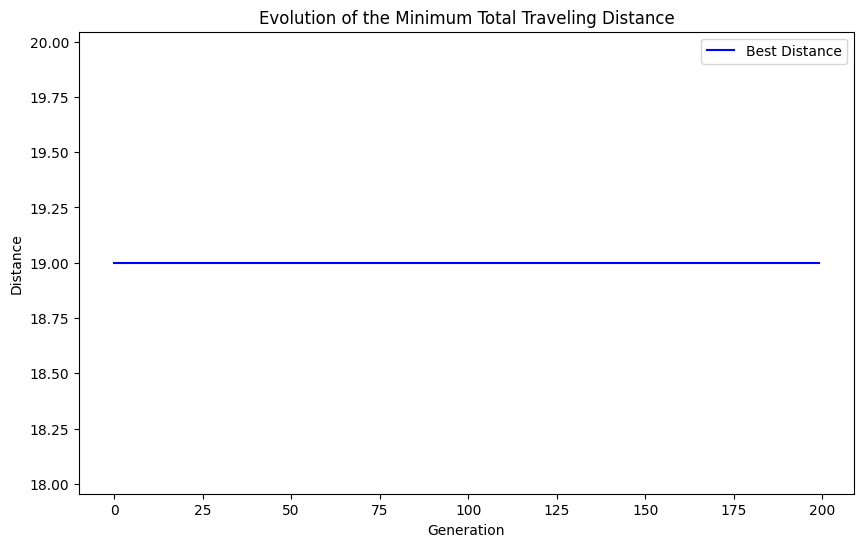

Best tour: [4, 3, 2, 0, 1]
Best distance: 19.0



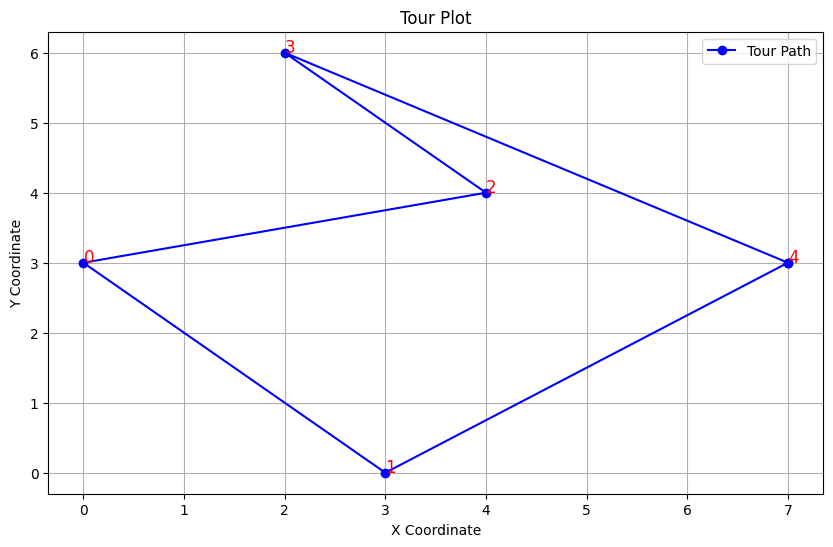

Running GA with population size 200 and generations 200
Generation 0: Best Distance = 19.0
Generation 1: Best Distance = 19.0
Generation 2: Best Distance = 19.0
Generation 3: Best Distance = 19.0
Generation 4: Best Distance = 19.0
Generation 5: Best Distance = 19.0
Generation 6: Best Distance = 19.0
Generation 7: Best Distance = 19.0
Generation 8: Best Distance = 19.0
Generation 9: Best Distance = 19.0
Generation 10: Best Distance = 19.0
Generation 11: Best Distance = 19.0
Generation 12: Best Distance = 19.0
Generation 13: Best Distance = 19.0
Generation 14: Best Distance = 19.0
Generation 15: Best Distance = 19.0
Generation 16: Best Distance = 19.0
Generation 17: Best Distance = 19.0
Generation 18: Best Distance = 19.0
Generation 19: Best Distance = 19.0
Generation 20: Best Distance = 19.0
Generation 21: Best Distance = 19.0
Generation 22: Best Distance = 19.0
Generation 23: Best Distance = 19.0
Generation 24: Best Distance = 19.0
Generation 25: Best Distance = 19.0
Generation 26: Bes

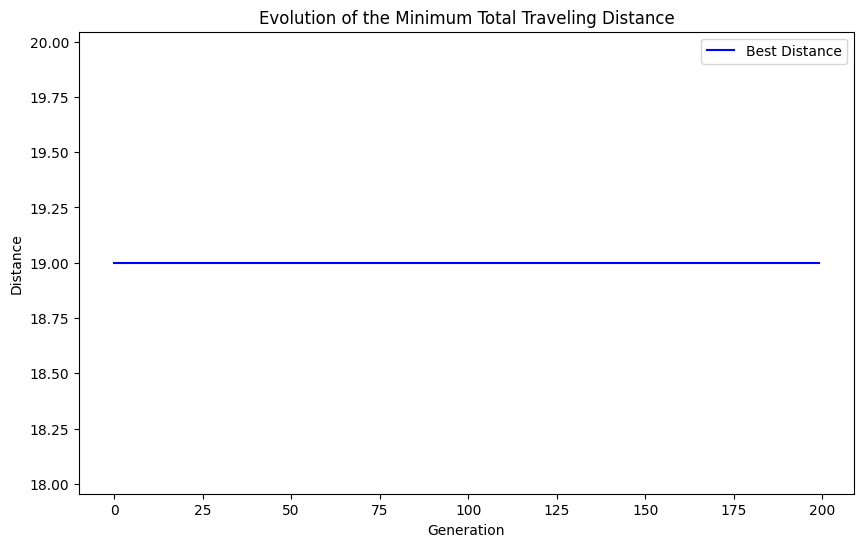

Best tour: [3, 2, 0, 1, 4]
Best distance: 19.0



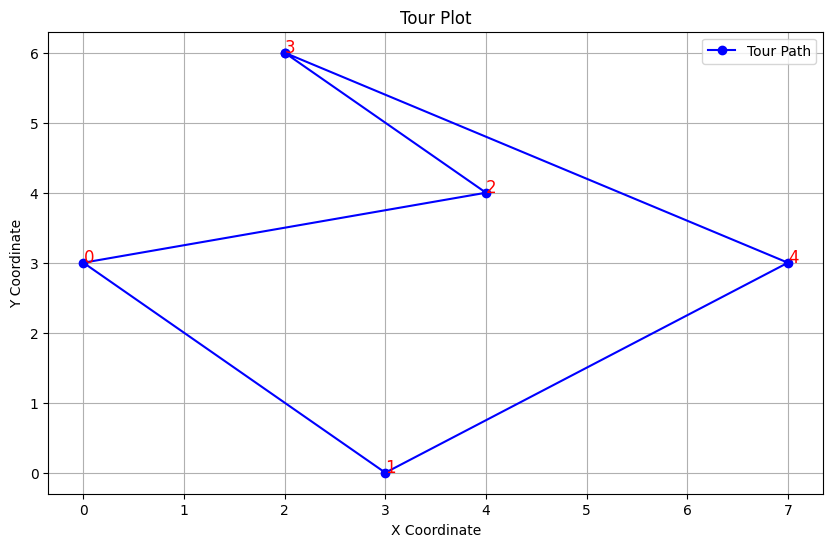

Summary of results:
Population Size | Number of Generations | Best Distance
            10 |                   10 | 19.0
            50 |                   50 | 19.0
           100 |                  100 | 19.0
           100 |                  150 | 19.0
           150 |                  200 | 19.0
           200 |                  200 | 19.0


In [7]:
import tsplib95
import random
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate the total distance of a tour
def calculate_distance(tour, distance_matrix):
    return sum(distance_matrix[tour[i-1]][tour[i]] for i in range(len(tour)))

# Function to create an initial population
def create_initial_population(size, num_cities):
    return [random.sample(range(num_cities), num_cities) for _ in range(size)]

# Function to perform tournament selection
def tournament_selection(population, fitnesses, k=3):
    selected = random.sample(list(zip(population, fitnesses)), k)
    selected.sort(key=lambda x: x[1])
    return selected[0][0]

# Function to perform roulette wheel selection
def roulette_wheel_selection(population, fitnesses):
    max_fitness = sum(fitnesses)
    pick = random.uniform(0, max_fitness)
    current = 0
    for i in range(len(population)):
        current += fitnesses[i]
        if current > pick:
            return population[i]

# Function to perform ordered crossover (OX1)
def ordered_crossover(parent1, parent2):
    size = len(parent1)
    start, end = sorted(random.sample(range(size), 2))
    child = [None]*size
    child[start:end] = parent1[start:end]
    pointer = end
    for i in range(size):
        if parent2[(end + i) % size] not in child:
            child[pointer % size] = parent2[(end + i) % size]
            pointer += 1
    return child

# Function to perform partially mapped crossover (PMX)
def partially_mapped_crossover(parent1, parent2):
    size = len(parent1)
    start, end = sorted(random.sample(range(size), 2))
    child = [None] * size

    # Copy segment from first parent to child
    child[start:end] = parent1[start:end]

    # Mapping from second parent
    for i in range(start, end):
        if parent2[i] not in child:
            current_pos = i
            while start <= current_pos < end:
                current_pos = parent1.index(parent2[current_pos])
            child[current_pos] = parent2[i]

    # Fill remaining positions
    for i in range(size):
        if child[i] is None:
            child[i] = parent2[i]

    return child

# Function to perform swap mutation
def swap_mutation(tour):
    a, b = random.sample(range(len(tour)), 2)
    tour[a], tour[b] = tour[b], tour[a]
    return tour

# Function to perform inversion mutation
def inversion_mutation(tour):
    a, b = sorted(random.sample(range(len(tour)), 2))
    tour[a:b] = reversed(tour[a:b])
    return tour

# Function to ensure valid TSP tour after crossover or mutation
def ensure_valid_tour(tour):
    missing = set(range(len(tour))) - set(tour)
    duplicates = [item for item in tour if tour.count(item) > 1]
    for dup in duplicates:
        tour[tour.index(dup)] = missing.pop()
    return tour

# Genetic Algorithm to solve TSP
def genetic_algorithm(distance_matrix, population_size=100, generations=500, mutation_rate=0.1, selection_method='tournament'):
    num_cities = len(distance_matrix)
    population = create_initial_population(population_size, num_cities)
    best_tour = None
    best_distance = float('inf')
    best_distances = []

    for gen in range(generations):
        fitnesses = [calculate_distance(tour, distance_matrix) for tour in population]
        new_population = []
        for _ in range(population_size // 2):
            if selection_method == 'tournament':
                parent1 = tournament_selection(population, fitnesses)
                parent2 = tournament_selection(population, fitnesses)
            elif selection_method == 'roulette':
                parent1 = roulette_wheel_selection(population, fitnesses)
                parent2 = roulette_wheel_selection(population, fitnesses)
                
            child1 = ordered_crossover(parent1, parent2)
            child2 = ordered_crossover(parent2, parent1)
            if random.random() < mutation_rate:
                child1 = swap_mutation(child1)
            if random.random() < mutation_rate:
                child2 = swap_mutation(child2)
            new_population.extend([ensure_valid_tour(child1), ensure_valid_tour(child2)])

        population = new_population
        current_best_distance = min(fitnesses)
        best_distances.append(current_best_distance)
        if current_best_distance < best_distance:
            best_distance = current_best_distance
            best_tour = population[fitnesses.index(current_best_distance)]
        print(f'Generation {gen}: Best Distance = {best_distance}')
    
    # Plot the evolution of the best distance
    plt.figure(figsize=(10, 6))
    plt.plot(best_distances, 'b-', label='Best Distance')
    plt.xlabel('Generation')
    plt.ylabel('Distance')
    plt.title('Evolution of the Minimum Total Traveling Distance')
    plt.legend()
    plt.show()

    return best_tour, best_distance

# Function to plot the best tour found
def plot_tour(tour, coords):
    num_cities = len(tour)
    x = [coords[city][0] for city in tour]
    y = [coords[city][1] for city in tour]
    
    plt.figure(figsize=(10, 6))
    plt.plot(x + [x[0]], y + [y[0]], 'bo-', label='Tour Path')
    for i, city in enumerate(tour):
        plt.text(coords[city][0], coords[city][1], str(city), fontsize=12, color='red')
    
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Tour Plot')
    plt.legend()
    plt.grid(True)
    plt.show()

# Dataset five_d.txt
def load_five_d_data(filename):
    with open(filename, 'r') as file:
        distance_matrix = []
        for line in file:
            if line.strip():  # Skip empty lines
                row = line.split()
                distance_matrix.append([float(num) for num in row])
    return np.array(distance_matrix)

# Run the GA on the dataset with different parameter combinations
distance_matrix = load_five_d_data('C:/Users/Kuldeep/five_d.txt')

# Parameter combinations
combinations = [
    (10, 10),
    (50, 50),
    (100, 100),
    (100, 150),
    (150, 200),
    (200, 200)
]

results = []

for population_size, generations in combinations:
    print(f'Running GA with population size {population_size} and generations {generations}')
    best_tour, best_distance = genetic_algorithm(distance_matrix, population_size=population_size, generations=generations)
    results.append((population_size, generations, best_distance))
    print(f'Best tour: {best_tour}\nBest distance: {best_distance}\n')
    plot_tour(best_tour, distance_matrix)

# Print summarized results
print("Summary of results:")
print("Population Size | Number of Generations | Best Distance")
for population_size, generations, best_distance in results:
    print(f"{population_size:>14} | {generations:>20} | {best_distance}")


Running GA on dataset: p01.tsp
Running GA with population size 10 and generations 10
Generation 0: Best Distance = 601
Generation 1: Best Distance = 601
Generation 2: Best Distance = 566
Generation 3: Best Distance = 566
Generation 4: Best Distance = 566
Generation 5: Best Distance = 566
Generation 6: Best Distance = 566
Generation 7: Best Distance = 470
Generation 8: Best Distance = 470
Generation 9: Best Distance = 470


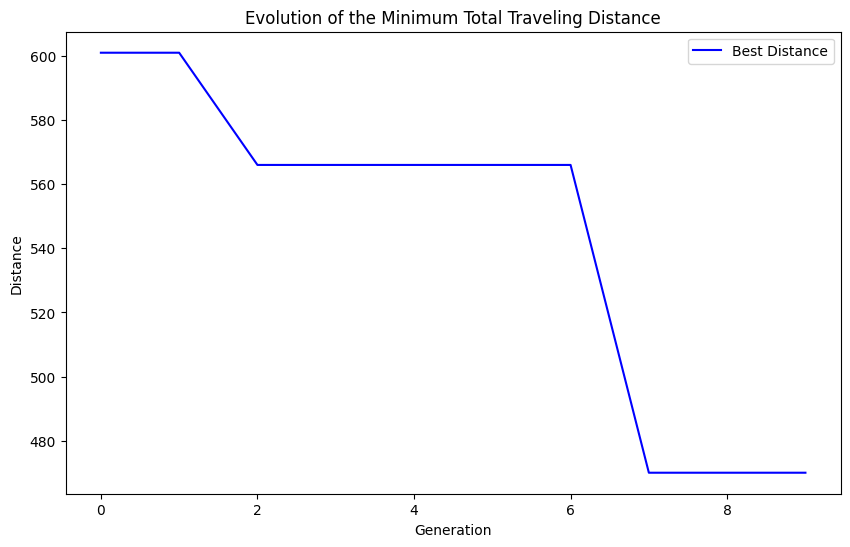

Best tour: [11, 2, 5, 1, 8, 12, 0, 3, 10, 6, 4, 14, 7, 9, 13]
Best distance: 470



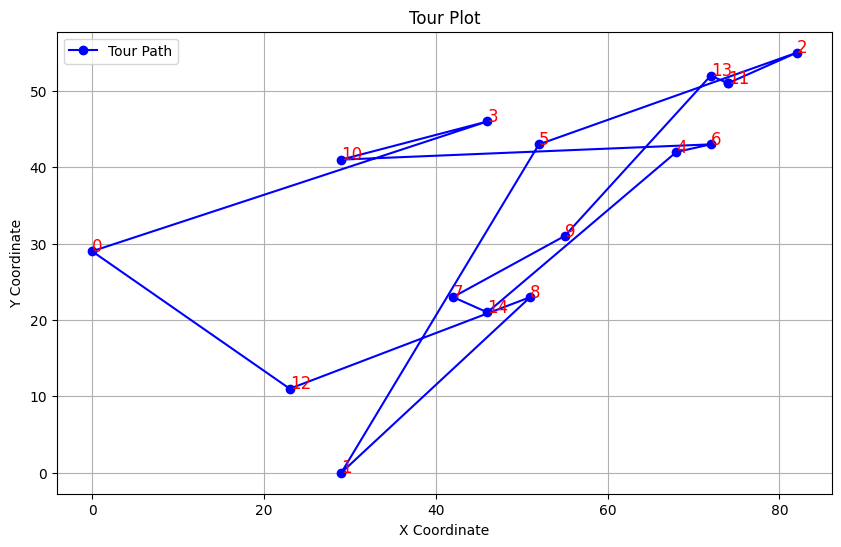

Running GA with population size 50 and generations 50
Generation 0: Best Distance = 557
Generation 1: Best Distance = 525
Generation 2: Best Distance = 493
Generation 3: Best Distance = 474
Generation 4: Best Distance = 474
Generation 5: Best Distance = 453
Generation 6: Best Distance = 453
Generation 7: Best Distance = 452
Generation 8: Best Distance = 452
Generation 9: Best Distance = 452
Generation 10: Best Distance = 431
Generation 11: Best Distance = 418
Generation 12: Best Distance = 418
Generation 13: Best Distance = 389
Generation 14: Best Distance = 389
Generation 15: Best Distance = 389
Generation 16: Best Distance = 389
Generation 17: Best Distance = 389
Generation 18: Best Distance = 389
Generation 19: Best Distance = 366
Generation 20: Best Distance = 362
Generation 21: Best Distance = 360
Generation 22: Best Distance = 360
Generation 23: Best Distance = 360
Generation 24: Best Distance = 353
Generation 25: Best Distance = 351
Generation 26: Best Distance = 329
Generation 

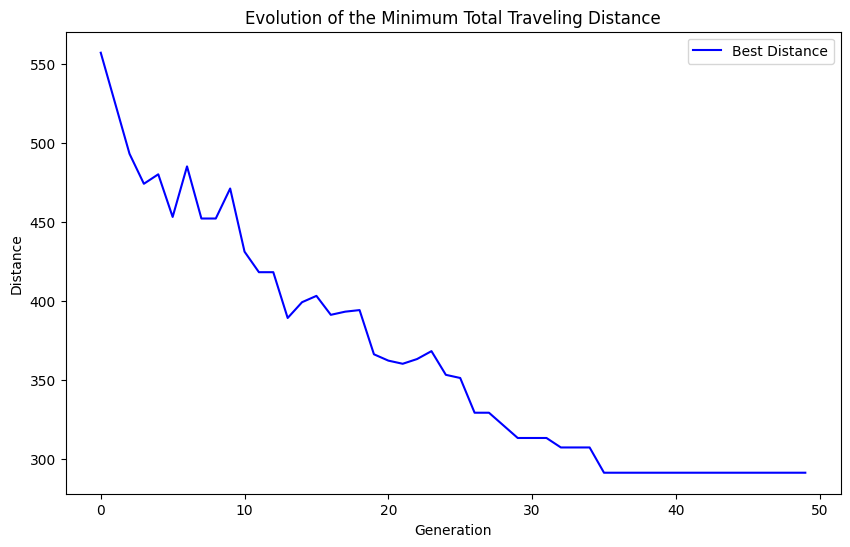

Best tour: [6, 4, 14, 8, 1, 12, 0, 10, 3, 5, 9, 7, 13, 11, 2]
Best distance: 291



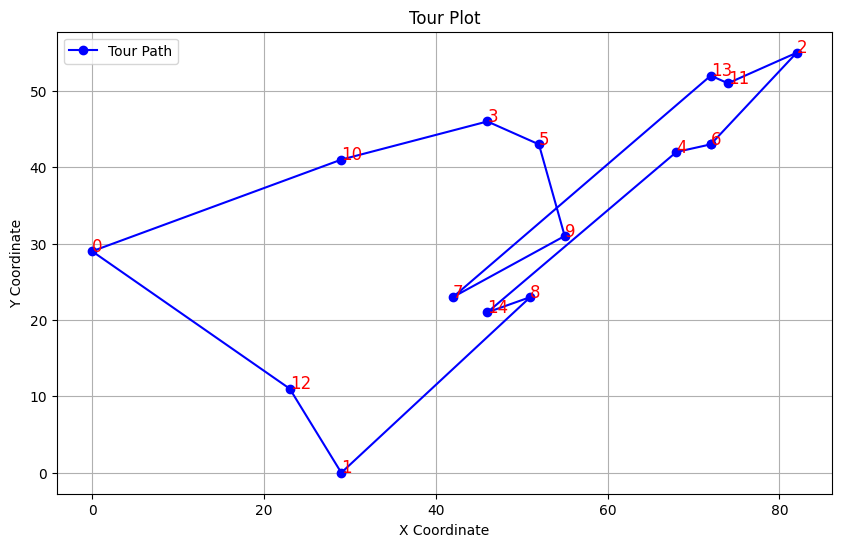

Running GA with population size 100 and generations 100
Generation 0: Best Distance = 499
Generation 1: Best Distance = 490
Generation 2: Best Distance = 490
Generation 3: Best Distance = 461
Generation 4: Best Distance = 444
Generation 5: Best Distance = 444
Generation 6: Best Distance = 381
Generation 7: Best Distance = 368
Generation 8: Best Distance = 349
Generation 9: Best Distance = 349
Generation 10: Best Distance = 348
Generation 11: Best Distance = 335
Generation 12: Best Distance = 321
Generation 13: Best Distance = 321
Generation 14: Best Distance = 313
Generation 15: Best Distance = 313
Generation 16: Best Distance = 299
Generation 17: Best Distance = 291
Generation 18: Best Distance = 291
Generation 19: Best Distance = 291
Generation 20: Best Distance = 291
Generation 21: Best Distance = 291
Generation 22: Best Distance = 291
Generation 23: Best Distance = 291
Generation 24: Best Distance = 291
Generation 25: Best Distance = 291
Generation 26: Best Distance = 291
Generatio

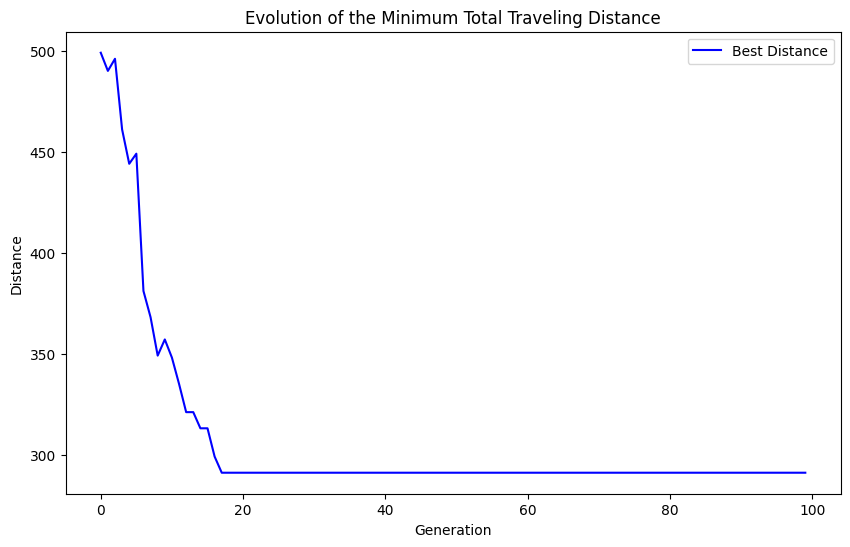

Best tour: [12, 1, 14, 8, 4, 6, 2, 9, 11, 13, 7, 5, 3, 10, 0]
Best distance: 291



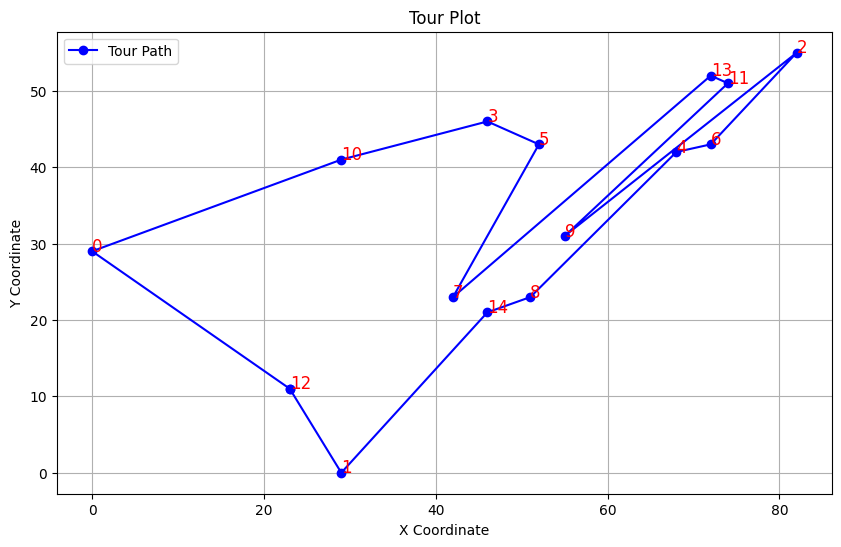

Running GA with population size 100 and generations 150
Generation 0: Best Distance = 489
Generation 1: Best Distance = 471
Generation 2: Best Distance = 466
Generation 3: Best Distance = 466
Generation 4: Best Distance = 455
Generation 5: Best Distance = 455
Generation 6: Best Distance = 455
Generation 7: Best Distance = 455
Generation 8: Best Distance = 414
Generation 9: Best Distance = 414
Generation 10: Best Distance = 410
Generation 11: Best Distance = 393
Generation 12: Best Distance = 374
Generation 13: Best Distance = 374
Generation 14: Best Distance = 374
Generation 15: Best Distance = 374
Generation 16: Best Distance = 373
Generation 17: Best Distance = 372
Generation 18: Best Distance = 346
Generation 19: Best Distance = 303
Generation 20: Best Distance = 303
Generation 21: Best Distance = 303
Generation 22: Best Distance = 303
Generation 23: Best Distance = 303
Generation 24: Best Distance = 303
Generation 25: Best Distance = 295
Generation 26: Best Distance = 295
Generatio

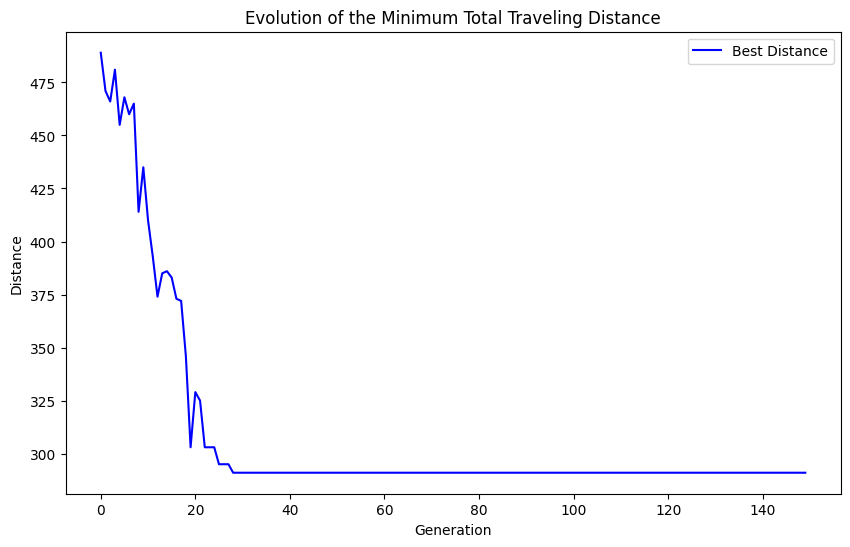

Best tour: [0, 12, 1, 14, 4, 8, 6, 2, 11, 13, 9, 7, 5, 3, 10]
Best distance: 291



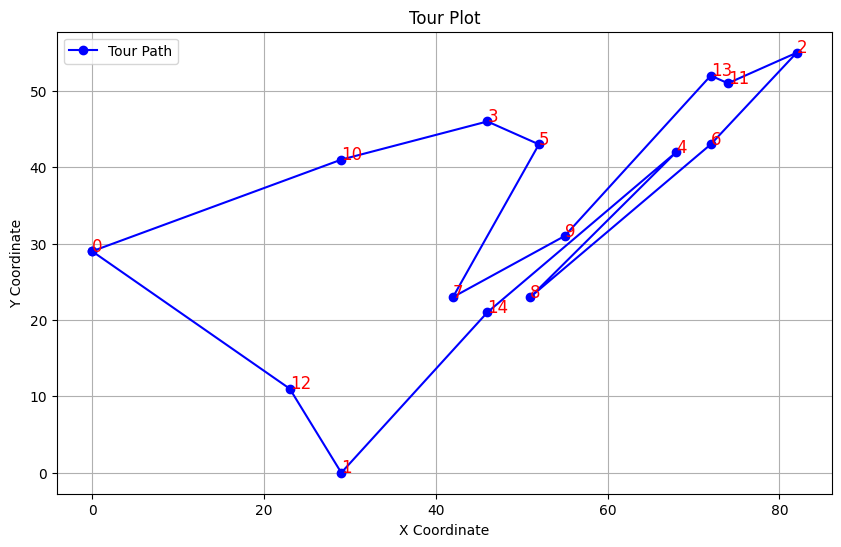

Running GA with population size 150 and generations 200
Generation 0: Best Distance = 509
Generation 1: Best Distance = 475
Generation 2: Best Distance = 475
Generation 3: Best Distance = 466
Generation 4: Best Distance = 447
Generation 5: Best Distance = 423
Generation 6: Best Distance = 423
Generation 7: Best Distance = 423
Generation 8: Best Distance = 420
Generation 9: Best Distance = 411
Generation 10: Best Distance = 401
Generation 11: Best Distance = 401
Generation 12: Best Distance = 371
Generation 13: Best Distance = 371
Generation 14: Best Distance = 371
Generation 15: Best Distance = 371
Generation 16: Best Distance = 365
Generation 17: Best Distance = 365
Generation 18: Best Distance = 365
Generation 19: Best Distance = 365
Generation 20: Best Distance = 362
Generation 21: Best Distance = 347
Generation 22: Best Distance = 347
Generation 23: Best Distance = 347
Generation 24: Best Distance = 347
Generation 25: Best Distance = 347
Generation 26: Best Distance = 327
Generatio

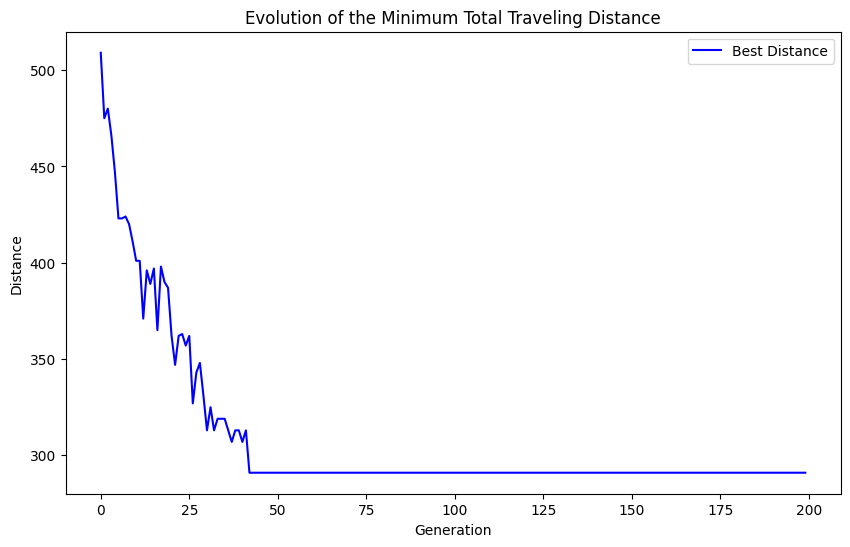

Best tour: [2, 7, 6, 4, 8, 14, 1, 12, 0, 10, 3, 5, 13, 11, 9]
Best distance: 291



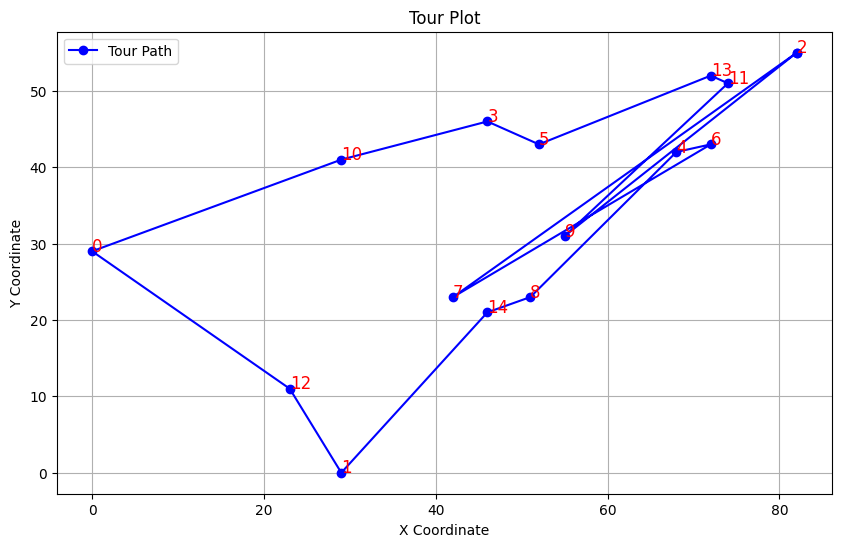

Running GA with population size 200 and generations 200
Generation 0: Best Distance = 527
Generation 1: Best Distance = 492
Generation 2: Best Distance = 447
Generation 3: Best Distance = 389
Generation 4: Best Distance = 389
Generation 5: Best Distance = 389
Generation 6: Best Distance = 389
Generation 7: Best Distance = 389
Generation 8: Best Distance = 388
Generation 9: Best Distance = 388
Generation 10: Best Distance = 388
Generation 11: Best Distance = 388
Generation 12: Best Distance = 351
Generation 13: Best Distance = 351
Generation 14: Best Distance = 351
Generation 15: Best Distance = 351
Generation 16: Best Distance = 351
Generation 17: Best Distance = 351
Generation 18: Best Distance = 325
Generation 19: Best Distance = 325
Generation 20: Best Distance = 325
Generation 21: Best Distance = 325
Generation 22: Best Distance = 325
Generation 23: Best Distance = 325
Generation 24: Best Distance = 317
Generation 25: Best Distance = 303
Generation 26: Best Distance = 303
Generatio

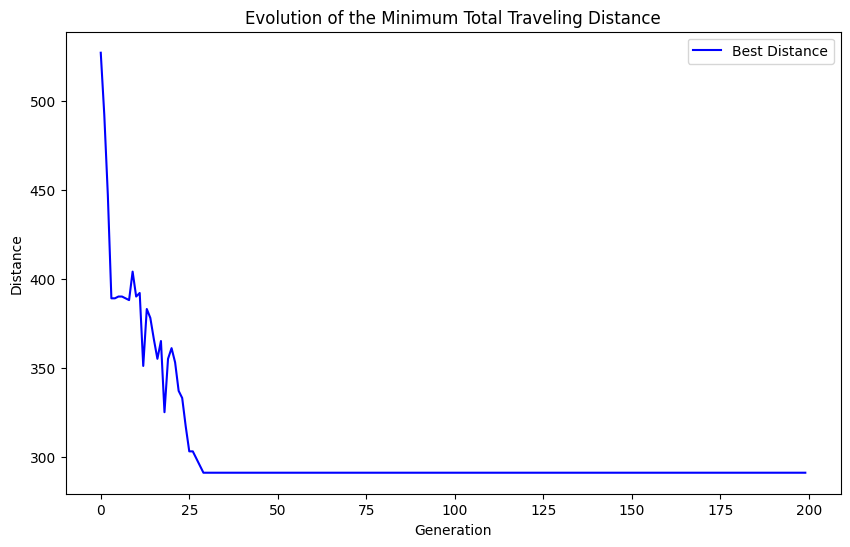

Best tour: [6, 2, 7, 5, 3, 10, 0, 1, 12, 14, 4, 8, 9, 11, 13]
Best distance: 291



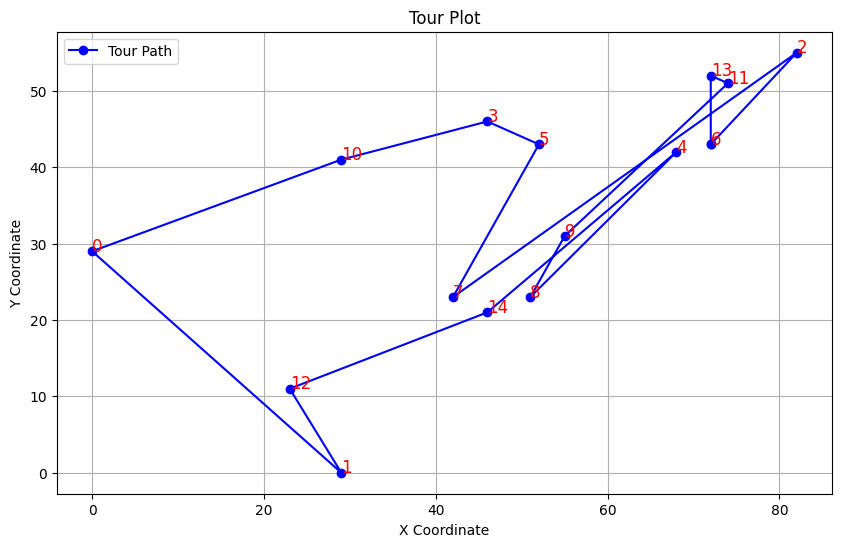

Summary of results:
Population Size | Number of Generations | Best Distance
            10 |                   10 | 470
            50 |                   50 | 291
           100 |                  100 | 291
           100 |                  150 | 291
           150 |                  200 | 291
           200 |                  200 | 291


In [8]:
import tsplib95
import random
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate the total distance of a tour
def calculate_distance(tour, distance_matrix):
    return sum(distance_matrix[tour[i-1]][tour[i]] for i in range(len(tour)))

# Function to create an initial population
def create_initial_population(size, num_cities):
    return [random.sample(range(num_cities), num_cities) for _ in range(size)]

# Function to perform tournament selection
def tournament_selection(population, fitnesses, k=3):
    selected = random.sample(list(zip(population, fitnesses)), k)
    selected.sort(key=lambda x: x[1])
    return selected[0][0]

# Function to perform roulette wheel selection
def roulette_wheel_selection(population, fitnesses):
    max_fitness = sum(fitnesses)
    pick = random.uniform(0, max_fitness)
    current = 0
    for i in range(len(population)):
        current += fitnesses[i]
        if current > pick:
            return population[i]

# Function to perform ordered crossover (OX1)
def ordered_crossover(parent1, parent2):
    size = len(parent1)
    start, end = sorted(random.sample(range(size), 2))
    child = [None]*size
    child[start:end] = parent1[start:end]
    pointer = end
    for i in range(size):
        if parent2[(end + i) % size] not in child:
            child[pointer % size] = parent2[(end + i) % size]
            pointer += 1
    return child

# Function to perform partially mapped crossover (PMX)
def partially_mapped_crossover(parent1, parent2):
    size = len(parent1)
    start, end = sorted(random.sample(range(size), 2))
    child = [None] * size

    # Copy segment from first parent to child
    child[start:end] = parent1[start:end]

    # Mapping from second parent
    for i in range(start, end):
        if parent2[i] not in child:
            current_pos = i
            while start <= current_pos < end:
                current_pos = parent1.index(parent2[current_pos])
            child[current_pos] = parent2[i]

    # Fill remaining positions
    for i in range(size):
        if child[i] is None:
            child[i] = parent2[i]

    return child

# Function to perform swap mutation
def swap_mutation(tour):
    a, b = random.sample(range(len(tour)), 2)
    tour[a], tour[b] = tour[b], tour[a]
    return tour

# Function to perform inversion mutation
def inversion_mutation(tour):
    a, b = sorted(random.sample(range(len(tour)), 2))
    tour[a:b] = reversed(tour[a:b])
    return tour

# Function to ensure valid TSP tour after crossover or mutation
def ensure_valid_tour(tour):
    missing = set(range(len(tour))) - set(tour)
    duplicates = [item for item in tour if tour.count(item) > 1]
    for dup in duplicates:
        tour[tour.index(dup)] = missing.pop()
    return tour

# Genetic Algorithm to solve TSP
def genetic_algorithm(distance_matrix, population_size=100, generations=500, mutation_rate=0.1, selection_method='tournament'):
    num_cities = len(distance_matrix)
    population = create_initial_population(population_size, num_cities)
    best_tour = None
    best_distance = float('inf')
    best_distances = []

    for gen in range(generations):
        fitnesses = [calculate_distance(tour, distance_matrix) for tour in population]
        new_population = []
        for _ in range(population_size // 2):
            if selection_method == 'tournament':
                parent1 = tournament_selection(population, fitnesses)
                parent2 = tournament_selection(population, fitnesses)
            elif selection_method == 'roulette':
                parent1 = roulette_wheel_selection(population, fitnesses)
                parent2 = roulette_wheel_selection(population, fitnesses)
                
            child1 = ordered_crossover(parent1, parent2)
            child2 = ordered_crossover(parent2, parent1)
            if random.random() < mutation_rate:
                child1 = swap_mutation(child1)
            if random.random() < mutation_rate:
                child2 = swap_mutation(child2)
            new_population.extend([ensure_valid_tour(child1), ensure_valid_tour(child2)])

        population = new_population
        current_best_distance = min(fitnesses)
        best_distances.append(current_best_distance)
        if current_best_distance < best_distance:
            best_distance = current_best_distance
            best_tour = population[fitnesses.index(current_best_distance)]
        print(f'Generation {gen}: Best Distance = {best_distance}')
    
    # Plot the evolution of the best distance
    plt.figure(figsize=(10, 6))
    plt.plot(best_distances, 'b-', label='Best Distance')
    plt.xlabel('Generation')
    plt.ylabel('Distance')
    plt.title('Evolution of the Minimum Total Traveling Distance')
    plt.legend()
    plt.show()

    return best_tour, best_distance

# Function to plot the best tour found
def plot_tour(tour, coords):
    num_cities = len(tour)
    x = [coords[city][0] for city in tour]
    y = [coords[city][1] for city in tour]
    
    plt.figure(figsize=(10, 6))
    plt.plot(x + [x[0]], y + [y[0]], 'bo-', label='Tour Path')
    for i, city in enumerate(tour):
        plt.text(coords[city][0], coords[city][1], str(city), fontsize=12, color='red')
    
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Tour Plot')
    plt.legend()
    plt.grid(True)
    plt.show()

# Dataset p01.tsp
# Manual loading for p01.tsp
def load_p01_tsp_manual(filename):
    with open(filename, 'r') as file:
        data = file.read().splitlines()
    dimension = 0
    edge_weight_section = False
    distance_matrix = []
    for line in data:
        if line.startswith("DIMENSION"):
            dimension = int(line.split()[-1])
        elif line.startswith("EDGE_WEIGHT_SECTION"):
            edge_weight_section = True
            continue
        elif line.startswith("EOF"):
            break
        elif edge_weight_section:
            numbers = list(map(int, line.split()))
            distance_matrix.append(numbers)
    distance_matrix = np.array(distance_matrix)
    return distance_matrix

# Run the GA on the dataset with different parameter combinations
print(f'Running GA on dataset: p01.tsp')
distance_matrix = load_p01_tsp_manual('C:/Users/Kuldeep/p01.tsp')

# Parameter combinations
combinations = [
    (10, 10),
    (50, 50),
    (100, 100),
    (100, 150),
    (150, 200),
    (200, 200)
]

results = []

for population_size, generations in combinations:
    print(f'Running GA with population size {population_size} and generations {generations}')
    best_tour, best_distance = genetic_algorithm(distance_matrix, population_size=population_size, generations=generations)
    results.append((population_size, generations, best_distance))
    print(f'Best tour: {best_tour}\nBest distance: {best_distance}\n')
    plot_tour(best_tour, distance_matrix)

# Print summarized results
print("Summary of results:")
print("Population Size | Number of Generations | Best Distance")
for population_size, generations, best_distance in results:
    print(f"{population_size:>14} | {generations:>20} | {best_distance}")
